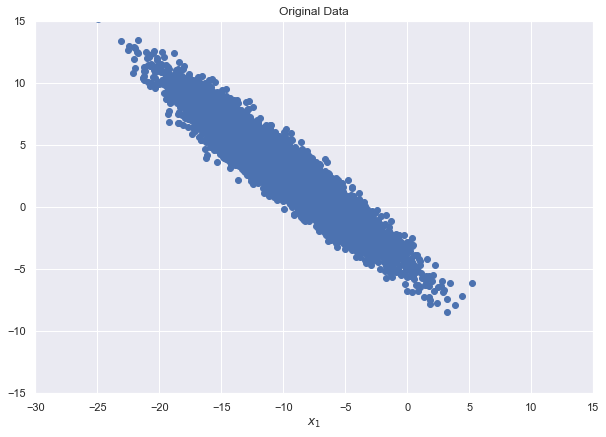

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rc('font', size=20)

np.random.seed(0)

n = 10000

a = np.random.randn(n, 2)
transform = np.array([[2, -3], [0, 1]])
translation = np.array([-5, 3])
data = a @ transform + translation[None, :]
data[:, 0] *= 2

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(data[:, 0], data[:, 1])

ax.set_title('Original Data')
ax.set_xlabel('$x_1$')

ax.set_xlim((-30, 15))
ax.set_ylim((-15, 15))
ax.set_aspect('equal', adjustable='box')

Apply standardization to `data`. Make a scatter plot of the standardized data.

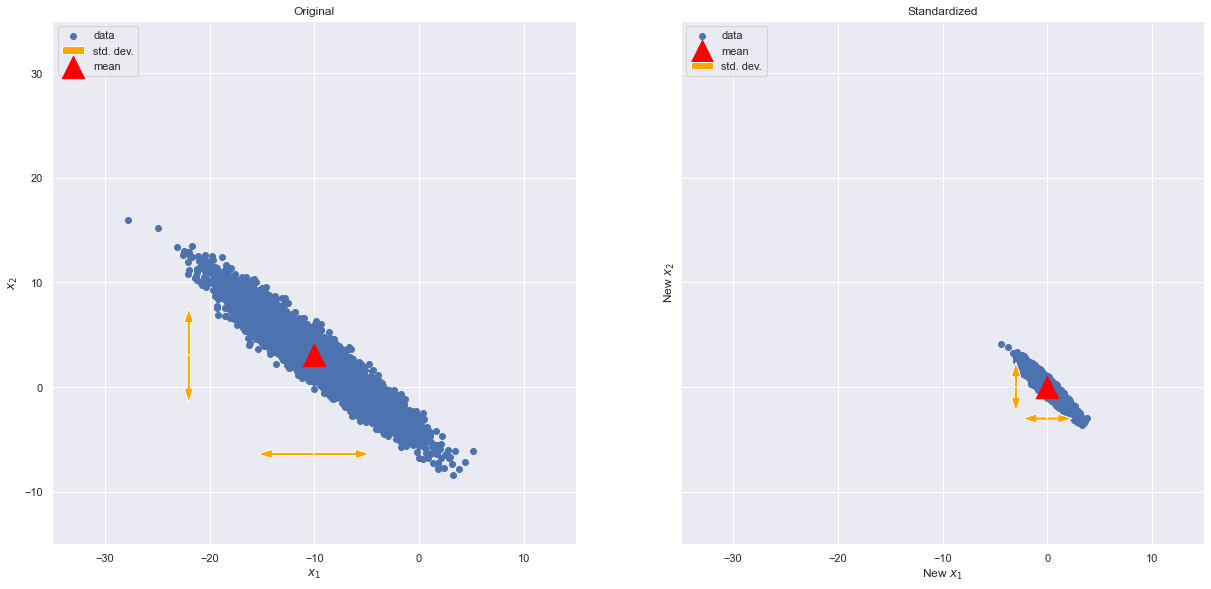

In [4]:
mean_orig = data.mean(axis=0)
std_orig = data.std(axis=0)
data_standard = (data - mean_orig[None, :]) / std_orig[None, :]

mean_standard = data_standard.mean(axis=0)
std_standard = data_standard.std(axis=0)

fig, axs = plt.subplots(1, 2, sharex='all', sharey='all',
                        gridspec_kw=dict(left=0.1, right=0.9, bottom=0.1, top=0.9),
                        figsize=(20, 10))

axs[0].scatter(data[:, 0], data[:, 1], label='data')
axs[1].scatter(data_standard[:, 0], data_standard[:, 1], label='data')

axs[0].arrow(mean_orig[0], mean_orig[1] - 3 * std_orig[1], std_orig[0], 0, width=.3, facecolor='orange')
axs[0].arrow(mean_orig[0], mean_orig[1] - 3 * std_orig[1], -std_orig[0], 0, width=.3, facecolor='orange')
axs[0].arrow(mean_orig[0] - 3 * std_orig[0], mean_orig[1], 0, std_orig[1], width=.3, facecolor='orange')
axs[0].arrow(mean_orig[0] - 3 * std_orig[0], mean_orig[1], 0, -std_orig[1], width=.3, facecolor='orange', label='std. dev.')

axs[0].scatter(mean_orig[0], mean_orig[1], marker='^', c='red', s=500, label='mean')
axs[1].scatter(mean_standard[0], mean_standard[1], marker='^', c='red', s=500, label='mean')

axs[1].arrow(mean_standard[0], mean_standard[1] - 3 * std_standard[0], std_standard[0], 0, width=.3, facecolor='orange')
axs[1].arrow(mean_standard[0], mean_standard[1] - 3 * std_standard[0], -std_standard[0], 0, width=.3, facecolor='orange')
axs[1].arrow(mean_standard[0] - 3 * std_standard[0], mean_standard[1], 0, std_standard[1], width=.3, facecolor='orange')
axs[1].arrow(mean_standard[0] - 3 * std_standard[0], mean_standard[1], 0, -std_standard[1], width=.3, facecolor='orange', label='std. dev.')

axs[0].set_title('Original')
axs[1].set_title('Standardized')

axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')

axs[0].set_xlabel('$x_1$')
axs[1].set_xlabel('New $x_1$')

axs[0].set_ylabel('$x_2$')
axs[1].set_ylabel('New $x_2$')

axs[0].set_xlim((-35, 15))
axs[1].set_xlim((-35, 15))

axs[0].set_ylim((-15, 35))
axs[1].set_ylim((-15, 35))

axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

del mean_orig, std_orig, data_standard, mean_standard, std_standard, fig, axs

Apply both centering and whitening to `data`. Make a scatter plot of the centered, whitened data.

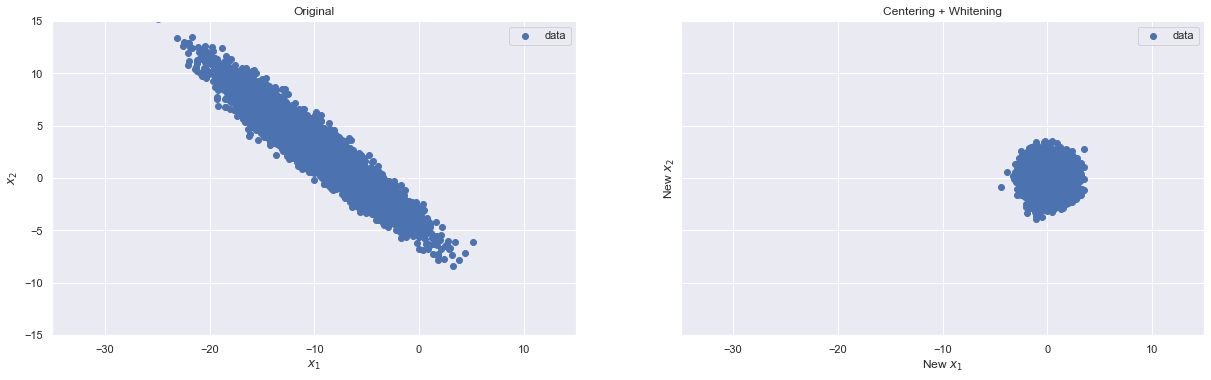

In [5]:
mean_orig = data.mean(axis=0)
cov_orig = np.cov(data.T)
w, v = np.linalg.eig(cov_orig)

data_nocor = (data - mean_orig[None, :]) @ v @ np.diag(1 / np.sqrt(w))

mean_nocor = data_nocor.mean(axis=0)

fig, axs = plt.subplots(1, 2, sharex='all', sharey='all',
                        gridspec_kw=dict(left=0.1, right=0.9, bottom=0.1, top=0.9),
                        figsize=(20, 10))

axs[0].scatter(data[:, 0], data[:, 1], label='data')
axs[1].scatter(data_nocor[:, 0], data_nocor[:, 1], label='data')

# axs[0].scatter(mean_orig[0], mean_orig[1], marker='^', c='red', s=500, label='mean')
# axs[1].scatter(mean_nocor[0], mean_nocor[1], marker='^', c='red', s=500, label='mean')

axs[0].set_title('Original')
axs[1].set_title('Centering + Whitening')

axs[0].legend(loc='upper right')
axs[1].legend(loc='upper right')

axs[0].set_xlabel('$x_1$')
axs[1].set_xlabel('New $x_1$')

axs[0].set_ylabel('$x_2$')
axs[1].set_ylabel('New $x_2$')

axs[0].set_xlim((-35, 15))
axs[1].set_xlim((-35, 15))

axs[0].set_ylim((-15, 15))
axs[1].set_ylim((-15, 15))

axs[0].set_aspect('equal', adjustable='box')
axs[1].set_aspect('equal', adjustable='box')

del mean_orig, data_nocor, mean_nocor, fig, axs